<a href="https://colab.research.google.com/github/hal-yu/datasci_3_eda/blob/main/HHA507_W3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 Exploratory Data Analysis

Engage in the critical phase of Exploratory Data Analysis (EDA) using the tools and techniques from Python to uncover patterns, spot anomalies, test hypotheses, and identify the main structures of your dataset.

## Univariate Analysis
1. Load a dataset of your choice in your Colab notebook .ipynb or in a python script .py (you can use one from previous assignments or find a new one).
2. Manually perform a univariate analysis to understand the distribution of each variable. This includes calculating measures of central tendency (mean, median, mode) and measures of spread (range, variance, standard deviation, IQR).
3. Visualize the distribution of select numerical variables using histograms.

### Cleaning Data

In [99]:
### Loading in packages
import pandas as pd

In [100]:
### Load in data
df = pd.read_csv('sleep_lifestyle_dataset.csv')

In [101]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [107]:
### Check for Missing Values
missing_values = df.isnull().sum()
print(missing_values)

person_id                  0
gender                     0
age                        0
occupation                 0
sleep_duration             0
quality_of_sleep           0
physical_activity_level    0
stress_level               0
bmi_category               0
blood_pressure             0
heart_rate                 0
daily_steps                0
sleep_disorder             0
dtype: int64


In [108]:
### Column names
df.columns

Index(['person_id', 'gender', 'age', 'occupation', 'sleep_duration',
       'quality_of_sleep', 'physical_activity_level', 'stress_level',
       'bmi_category', 'blood_pressure', 'heart_rate', 'daily_steps',
       'sleep_disorder'],
      dtype='object')

In [109]:
import re
import numpy

In [110]:
# Function to remove white space and special characters from a value
def clean_column_names(data):
  def clean_name(value):
    cleaned_name = re.sub(r'[^a-zA-Z0-9$()]', '_', value)
    return cleaned_name.lower()

# Applying function for all columns
  data.columns = [clean_name(col) for col in data.columns]
  return data

df = clean_column_names(df)

In [ ]:
df

### Multiple Imputation

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
### Perform multiple imputation
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(df[["age", "sleep_duration", "quality_of_sleep", "physical_activity_level"]])
### Create a Dataframe with imputed values
imputed_df = pd.DataFrame(imputed_data, columns=["age", "sleep_duration", "quality_of_sleep", "physical_activity_level"])
### Combine imputed values with original dataset
sleep_and_physical_activity_df = pd.concat([df["gender"], imputed_df], axis =1)

In [ ]:
print("\nDataFrame with Imputed Values:")
print(sleep_and_physical_activity_df)

In [ ]:
sleep_and_physical_activity_df.describe()

### Distribution of Variables

In [120]:
# Calculate mean, median, and mode of a health metric
mean_value_sleep_duration = df['sleep_duration'].mean()
median_value_heart_rate = df['heart_rate'].median()
mode_value_stress_level = df['stress_level'].mode().iloc[0]

# Calculatre variance and standard deviation for sleep duration
variance_sd = np.var(df['sleep_duration'])
std_deviation_sd = np.std(df['sleep_duration'])

# Calculate percentiles for stress level
percentile_25_stress = np.percentile(df['stress_level'], 25)
percentile_75_stress = np.percentile(df['stress_level'], 75)

# Calculate range for Age
data_age_range = df['age'].max() - df['age'].min()

# Calculate correlation and covariance
correlation_matrix_1 = df[['bmi_category', 'sleep_duration', 'heart_rate']].corr(numeric_only=True)
covariance_matrix_2 = df[['physical_activity_level', 'daily_steps', 'sleep_disorder']].corr(numeric_only=True)

# Print results
print("Mean Sleep Duration:", mean_value_sleep_duration)
print("Median Heart Rate:", median_value_heart_rate)
print("Mode Stress Level:", mode_value_stress_level)
print("Variance Sleep Duration:", variance_sd)
print("Standard Deviation Sleep Duration:", std_deviation_sd)
print("25th Percentile Stress:", percentile_25_stress)
print("75th Percentile Stress:", percentile_75_stress)
print("Data Range (Age):", data_age_range)
print("Correlation Matrix 1:\n", correlation_matrix_1)
print("Covariance Matrix 2:\n", covariance_matrix_2)

Mean Sleep Duration: 7.132085561497325
Median Heart Rate: 70.0
Mode Stress Level: 3
Variance Sleep Duration: 0.6313769338557008
Standard Deviation Sleep Duration: 0.7945923066929989
25th Percentile Stress: 4.0
75th Percentile Stress: 7.0
Data Range (Age): 32
Correlation Matrix 1:
                 sleep_duration  heart_rate
sleep_duration        1.000000   -0.516455
heart_rate           -0.516455    1.000000
Covariance Matrix 2:
                          physical_activity_level  daily_steps
physical_activity_level                 1.000000     0.772723
daily_steps                             0.772723     1.000000


### Visualizing Distributions

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create a histogram
sns.histplot(df['age'], bins=10, kde=True)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('age Distribution')
plt.show()

### Histograms

In [121]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(df['heart_rate'], bins=30, density=True, alpha=0.7, color='red', label='Histogram')
plt.title('Probability Density for Heart Rate')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.hist(df['physical_activity_level'], bins=30, density=True, alpha=0.5, color='red', label='Histogram')
plt.title('Probability Density for Physical Activity Levels')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

### Shapiro-Wilk Test for Normality

In [141]:
from scipy.stats import shapiro

In [142]:
stat, p = shapiro(df['heart_rate'])
if p > 0.05:
    print("Heart Rate Data follows a normal distribution.")
else:
    print("Heart Rata Data does not follow a normal distribution.")

Heart Rata Data does not follow a normal distribution.


## Bivariate Analysis:
1. Analyze the relationship between pairs of variables.
2. Use scatter plots to explore potential relationships between two numerical variables.
3. For categorical and numerical variable pairs, use boxplots.
4. Compute correlation coefficients for numerical variables and document any strong correlations observed.

### Scatter Plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

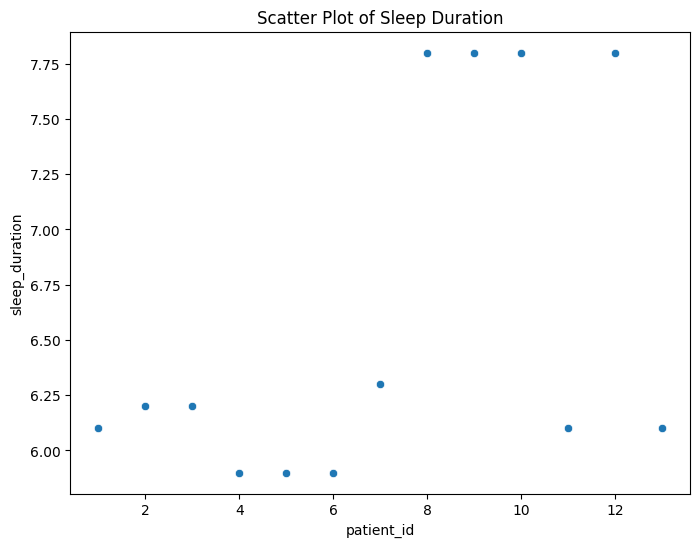

In [ ]:
### Create Scatterplot for Sleep Duration
selected_patient_ids = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sleep_duration = df['sleep_duration']
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['person_id'].iloc[selected_patient_ids], y=sleep_duration.iloc[selected_patient_ids])
plt.xlabel("patient_id")
plt.ylabel("sleep_duration")
plt.title("Scatter Plot of Sleep Duration")
plt.show()

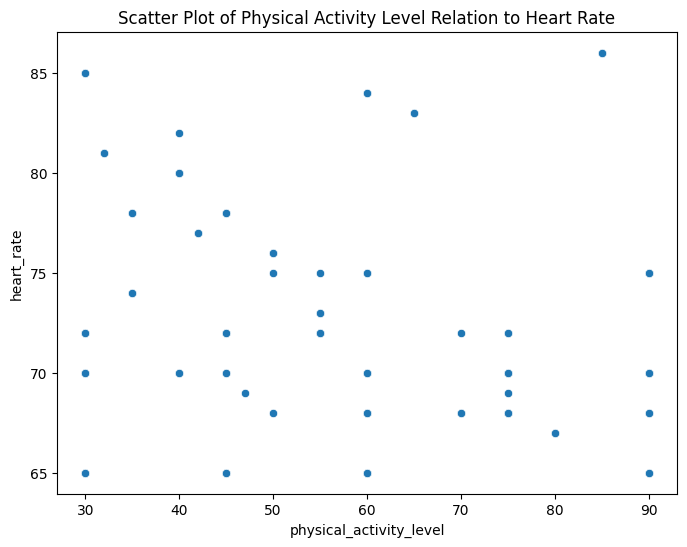

In [ ]:
### Create Scatterplot for Physical Activity and Heart Rate
physical_activity_level = df['physical_activity_level']
heart_rate = df['heart_rate']
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['physical_activity_level'], y=heart_rate)
plt.xlabel("physical_activity_level")
plt.ylabel("heart_rate")
plt.title("Scatter Plot of Physical Activity Level Relation to Heart Rate")
plt.show()

## Handling Outliers:
1. Identify outliers in your dataset using the IQR method or visualization tools.
2. Decide on an approach to handle these outliers (e.g., remove, replace, or retain) and justify your decision in a markdown cell.
3. If there are no outliers based on 1, 2, or 3 standard deviations (or z scores >= 1), please state that and support it with your code.


### Z-Score

In [ ]:
from scipy.stats import zscore
import numpy as np

In [ ]:
### Calculate z-score for heart rate
z_scores = zscore(heart_rate)
z_scores

In [ ]:
### Set threshold for outlier detecion
threshold = 2

### Identify Outliers
outliers = np.where(np.abs(z_scores) > threshold)

### Fetch outlier values using identified indices
outlier_values = [heart_rate[i] for i in outliers[0]]

print("Outlier Indices in Array:", outliers)
print("Outlier Values:", outlier_values)

### IQR (Interquartile Range)

In [ ]:
### Calculate quartiles and IQR
q1 = np.percentile(heart_rate, 25)
q3 = np.percentile(heart_rate, 75)
iqr = q3 - q1

### Set threshold for outlier detection
threshold_lower = q1 - 1.5 * iqr
threshold_upper = q3 +1.5 * iqr

### Identify Outliers
outlier_iqr = [x for x in heart_rate if x < threshold_lower or x > threshold_upper]
print("Outliers:", outlier_iqr)

Outliers: [85, 85, 85, 82, 80, 80, 81, 81, 84, 84, 80, 83, 83, 86, 86]


In [ ]:
### Identify Outliers
outlier_iqr = [x for x in heart_rate if x < threshold_lower or x > threshold_upper]
print("Outliers:", outlier_iqr)

Outliers: [85, 85, 85, 82, 80, 80, 81, 81, 84, 84, 80, 83, 83, 86, 86]


#### Handling Outliers:
The outliers detected using z-score and IQR are the same: 85, 85, 85, 82, 80, 80, 81, 81, 84, 84, 80, 83, 83, 86, 86. These are still in the normal range for human heart rate. However, these results could be a result of data entry errors or measurement issues, so removing them could improve the quality of the data.

### Removing outliers

In [ ]:
heart_rate_threshold = 79

#Remove data above the heart rate threshold
df_cleaned = df[df['heart_rate'] <= heart_rate_threshold]

print(df_cleaned)

     person_id  gender  age         occupation  sleep_duration  \
0            1    Male   27  Software Engineer             6.1   
1            2    Male   28             Doctor             6.2   
2            3    Male   28             Doctor             6.2   
7            8    Male   29             Doctor             7.8   
8            9    Male   29             Doctor             7.8   
..         ...     ...  ...                ...             ...   
369        370  Female   59              Nurse             8.1   
370        371  Female   59              Nurse             8.0   
371        372  Female   59              Nurse             8.1   
372        373  Female   59              Nurse             8.1   
373        374  Female   59              Nurse             8.1   

     quality_of_sleep  physical_activity_level  stress_level bmi_category  \
0                   6                       42             6   Overweight   
1                   6                       60       

In [ ]:
### Save csv as sleep_lifestyle_cleaned.csv
df.to_csv('sleep_lifestyle_cleaned.csv')

## Automated Analysis
1. Using the automated EDA tool pandas profiling (e.g., please refer to https://book.datascience.appliedhealthinformatics.com/docs/Ch3/automatic_EDA)
2. Load in your dataset and analyze it
3. Save the output (.html) in your report, within a folder called automaticEDA